# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [1]:
# import pandas
import pandas as pd

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [3]:
# load imdb dataset as pandas dataframe
import pandas as pd

df1 = pd.read_csv(r"C:\Users\mdtam\Downloads\imdb_1000.csv")
print(df1.head())

   star_rating                     title content_rating   genre  duration  \
0          9.3  The Shawshank Redemption              R   Crime       142   
1          9.2             The Godfather              R   Crime       175   
2          9.1    The Godfather: Part II              R   Crime       200   
3          9.0           The Dark Knight          PG-13  Action       152   
4          8.9              Pulp Fiction              R   Crime       154   

                                         actors_list  
0  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
1    [u'Marlon Brando', u'Al Pacino', u'James Caan']  
2  [u'Al Pacino', u'Robert De Niro', u'Robert Duv...  
3  [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
4  [u'John Travolta', u'Uma Thurman', u'Samuel L....  


In [4]:
# show first 5 rows of imdb_df
df1.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [6]:
# load bikes dataset as pandas dataframe
import pandas as pd

df2 = pd.read_csv(r"C:\Users\mdtam\Downloads\bikes.csv", 
                  sep=';', 
                  parse_dates=['Date'], 
                  date_parser=lambda x: pd.to_datetime(x, format='%d/%m/%Y'))

print(df2.head())


        Date        Brand    Model  Price  Sold
0 2023-01-01         Trek   Domane   1200     5
1 2023-01-05        Giant     Defy   1000     7
2 2023-01-10   Cannondale  Synapse   1500     3
3 2023-01-15  Specialized    Allez   1100     4
4 2023-01-20        Scott   Addict   1300     6


C:\Users\mdtam\AppData\Local\Temp\ipykernel_17904\636161827.py:4: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df2 = pd.read_csv(r"C:\Users\mdtam\Downloads\bikes.csv",


In [7]:
# show first 3 rows of bikes_df
df2.head(3)

,Date,Brand,Model,Price,Sold
0,2023-01-01,Trek,Domane,1200,5
1,2023-01-05,Giant,Defy,1000,7
2,2023-01-10,Cannondale,Synapse,1500,3


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [8]:
# list columns of imdb_df
df1.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [10]:
# what are the datatypes of values in columns
# Check datatypes of columns in df1
df1.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [11]:
# list first 5 movie titles
df1.loc[0:5,["title"]]

,title
0,The Shawshank Redemption
1,The Godfather
2,The Godfather: Part II
3,The Dark Knight
4,Pulp Fiction
5,12 Angry Men


In [12]:
# show only movie title and genre
df1[['title','genre']]

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime
...,...,...
974,Tootsie,Comedy
975,Back to the Future Part III,Adventure
976,Master and Commander: The Far Side of the World,Action
977,Poltergeist,Horror


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [13]:
# show the type of duration column
df1['duration'].dtype

dtype('int64')

In [14]:
# show duration values of movies as numpy arrays
import numpy as np
s1 = np.array(df1['duration'])

print(s1)
print(type(s1))

[142 175 200 152 154  96 161 201 195 139 178 148 124 142 179 169 133 207
 146 121 136 130 130 106 127 116 175 118 110  87 125 112 102 107 119  87
 169 115 112 109 189 110 150 165 155 137 113 165  95 151 155 153 125 130
 116  89 137 117  88 165 170  89 146  99  98 116 156 122 149 134 122 136
 157 123 119 137 128 120 229 107 134 103 177 129 102 216 136  93  68 189
  99 108 113 181 103 138 110 129  88 160 126  91 116 125 143  93 102 132
 153 183 160 120 138 140 153 170 129  81 127 131 172 115 108 107 129 156
  96  91  95 162 130  86 186 151  96 170 118 161 131 126 131 129 224 180
 105 117 140 119 124 130 139 107 132 117 126 122 178 238 149 172  98 116
 116 123 148 123 182  92  93 100 135 105  94 140  83  95  98 143  99  98
 121 163 121 167 188 121 109 110 129 127  94 107 100 117 129 120 121 133
 111 122 101 134 165 138 212 154  89 134  93 114  88 130 101 158  99 108
 124 132 113 131 191 167 130 147 102  88 165 132 118 101 108 174  98  92
  98 106  85 101 105 115 115 124 105 103 138 184 12

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [15]:
# convert all the movie titles to uppercase
to_uppercase = lambda x: x.upper()
df1['title'].apply(to_uppercase).head()

0    THE SHAWSHANK REDEMPTION
1               THE GODFATHER
2      THE GODFATHER: PART II
3             THE DARK KNIGHT
4                PULP FICTION
Name: title, dtype: object

## Plotting a column

Use ``.plot()`` function!

In [16]:
# plot the bikers travelling to Berri1 over the year
df2.head()

,Date,Brand,Model,Price,Sold
0,2023-01-01,Trek,Domane,1200,5
1,2023-01-05,Giant,Defy,1000,7
2,2023-01-10,Cannondale,Synapse,1500,3
3,2023-01-15,Specialized,Allez,1100,4
4,2023-01-20,Scott,Addict,1300,6


In [30]:
import pandas as pd

df2 = pd.read_csv("bikes.csv")
print(df2.columns)


Index(['Date;Berri_1;Berri_2'], dtype='object')


## Value counts

Get count of unique values in a particular column/Series.

In [31]:
# what are the unique genre in imdb_df?
genre_arr = pd.unique(df1['genre'])
genre_arr

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

<Axes: xlabel='genre'>

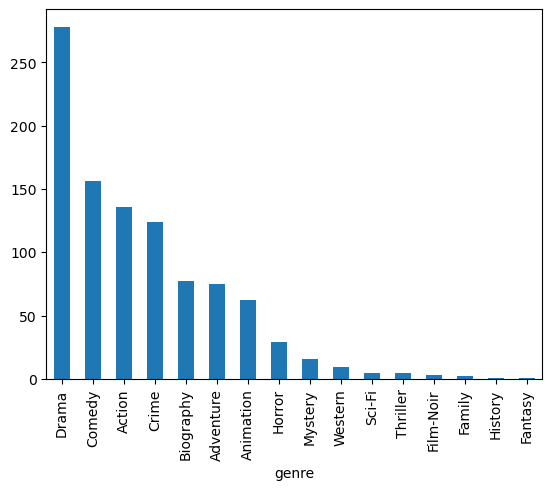

In [43]:
# plotting value counts of unique genres as a bar chart
df1['genre'].value_counts().plot.bar()

<Axes: ylabel='count'>

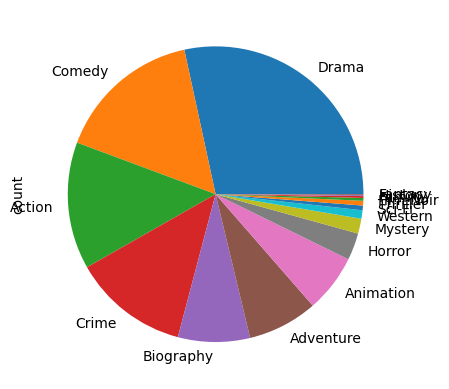

In [42]:
# plotting value counts of unique genres as a pie chart
df1['genre'].value_counts().plot.pie()

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [63]:
# show index of bikes_df
df2.index.values
#df2.index

array([0, 1, 2, 3, 4])

In [70]:
# get row for date 2012-01-01
df2.index


RangeIndex(start=0, stop=5, step=1)

#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [62]:
# show 11th row of imdb_df using iloc


## Selecting rows where column has a particular value

In [ ]:
# select only those movies where genre is adventure

In [ ]:
# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?

## Adding a new column to DataFrame

In [ ]:
# add a weekday column to bikes_df

## Deleting an existing column from DataFrame

In [ ]:
# remove column 'Unnamed: 1' from bikes_df

## Deleting a row in DataFrame

In [ ]:
# remove row no. 1 from bikes_df

## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [ ]:
# group imdb_df by movie genres

In [ ]:
# get crime movies group

In [ ]:
# get mean of movie durations for each group

In [ ]:
# change duration of all movies in a particular genre to mean duration of the group

In [ ]:
# drop groups/genres that do not have average movie duration greater than 120.

In [ ]:
# group weekday wise bikers count

In [ ]:
# get weekday wise biker count

In [ ]:
# plot weekday wise biker count for 'Berri1'


![](https://memegenerator.net/img/instances/500x/73988569/pythonpandas-is-easy-import-and-go.jpg)